<a href="https://colab.research.google.com/github/EzarIbrahim19/EzarProject/blob/master/Submission_ML_Augmentasi_BGT_EzAr_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Classifier Batu, Gunting, Kertas



In [1]:
#import library yang dibutuhkan
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os


cek versi tensorflow

In [2]:
print(tf.__version__)

2.2.0


mendapatkan dataset

In [3]:
# mendownload file dalam bentuk zip
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-15 02:55:47--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.63MB/s    in 49s     

2020-07-15 02:56:36 (6.34 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
# mengekstraksi file zip
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')


In [5]:
os.listdir('/tmp/rockpaperscissors')

['rock', 'README_rpc-cv-images.txt', 'scissors', 'paper', 'rps-cv-images']

cek panjang atau jumlah data


In [6]:
len(os.listdir('/tmp/rockpaperscissors/scissors'))

750

In [7]:
len(os.listdir('/tmp/rockpaperscissors/paper'))

712

In [8]:
len(os.listdir('/tmp/rockpaperscissors/rock'))

726

In [10]:
# membuat direktori train dan validation (dijalankan hanya sekali)
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [11]:
os.listdir('/tmp/rockpaperscissors')

['rock',
 'README_rpc-cv-images.txt',
 'train',
 'scissors',
 'val',
 'paper',
 'rps-cv-images']

In [12]:
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

memecah direktori rock,scissors dan paper masing2 menjadi data train dan data validation

In [13]:
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.2)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.2)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.2)


In [15]:
train_paper = os.path.join(train_dir, 'paper')
val_paper = os.path.join(validation_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_scissors = os.path.join(validation_dir, 'scissors')
train_rock = os.path.join(train_dir, 'rock')
val_rock = os.path.join(validation_dir, 'rock')

# membuat directory baru di dalam directory train dan val masing-masing
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)

if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)

if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(val_rock):
  os.mkdir(val_rock)





In [16]:
# mengcopy data train dan data val ke directory baru dengan librari shutil
import shutil

for a in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, a), os.path.join(train_rock, a))
for a in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,a), os.path.join(train_paper,a))
for a in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,a), os.path.join(train_scissors,a))

for a in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, a), os.path.join(val_rock,a))
for a in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,a), os.path.join(val_paper,a))
for a in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,a), os.path.join(val_scissors,a))

membuat sebuah objek ImageDataGenerator untuk data training dan data testing.

In [17]:
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator( 
    rescale = 1./225, 
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

menggunakan objek image data generator sebelumnya untuk mempersiapkan data latih yang akan dipelajari oleh model.

In [18]:
# split into train and test
train_generator = train_datagen.flow_from_directory(
    train_dir, #direktori data latih
    target_size=(100, 100), #mengubah resolusi seluruh gambar menjadi 100x100 pixels
    batch_size =32,
    #melakukan masalah klasifikasi 3 kelas maka menggunakan class_mode ='Categorical'
    class_mode ='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir, #direktori data validasi
    target_size=(100, 100),
    batch_size=32,
    class_mode = 'categorical')

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


membuat model

In [19]:
#mendefinisikan model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),

    #512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

memanggil fungsi compile pada objek model, dan tentukan loss function serta optimizer.

In [20]:
#compile model
model.compile(loss='categorical_crossentropy',
              optimizer= 'RMSprop',
              metrics=['accuracy'])

In [ ]:
#fit / training model
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 34s - loss: 1.4603 - accuracy: 0.4150 - val_loss: 1.1366 - val_accuracy: 0.5750
Epoch 2/20
25/25 - 34s - loss: 0.8626 - accuracy: 0.6375 - val_loss: 0.5560 - val_accuracy: 0.8125
Epoch 3/20
25/25 - 34s - loss: 0.4886 - accuracy: 0.8200 - val_loss: 0.3605 - val_accuracy: 0.8750
Epoch 4/20
25/25 - 34s - loss: 0.3715 - accuracy: 0.8593 - val_loss: 0.3126 - val_accuracy: 0.8938
Epoch 5/20
25/25 - 34s - loss: 0.2790 - accuracy: 0.9025 - val_loss: 0.4499 - val_accuracy: 0.8438
Epoch 6/20
25/25 - 34s - loss: 0.2383 - accuracy: 0.9062 - val_loss: 0.2401 - val_accuracy: 0.9125
Epoch 7/20
25/25 - 34s - loss: 0.2195 - accuracy: 0.9237 - val_loss: 0.1817 - val_accuracy: 0.9250
Epoch 8/20
25/25 - 34s - loss: 0.2201 - accuracy: 0.9187 - val_loss: 0.2781 - val_accuracy: 0.8938
Epoch 9/20
25/25 - 34s - loss: 0.1722 - accuracy: 0.9375 - val_loss: 0.0839 - val_accuracy: 0.9563
Epoch 10/20
25/25 - 37s - loss: 0.1341 - accuracy: 0.9550 - val_loss: 0.2207 - val_accuracy: 0.9312
Epoch 11/

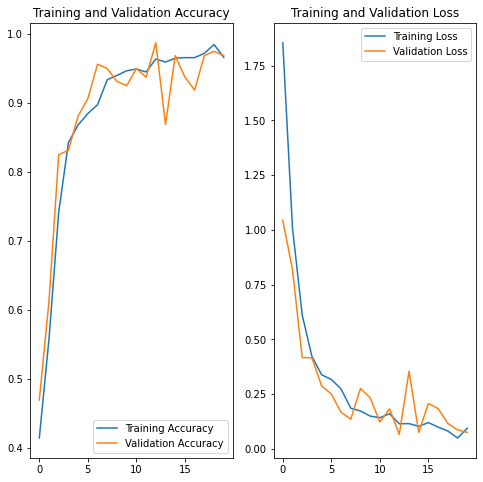

In [ ]:
# memvisualisasikan hasil data training 

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import numpy as np
from google.colab import files 
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

 
uploaded = files.upload()
 
for ez in uploaded.keys():
 
  # predicting images
  path = ez
  img = image.load_img(path, target_size=(100,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(ez)
  if classes [0,0] !=0:
    print('paper')
  elif classes [0,1] !=0:
    print('rock')
  else:
    print('scissors')